Shchrödinger's Equation
=====
# Barry O'Donnell

## 24/10/2019

This assignment looks at using *algorithms* to compute a solution to Shchrödinger's Equation when a particle is trapped within an infinite-potential well of width *L* (in this example, *L = 1*)

To solve this problem, I will be using the following formulae;

### $$ I = \int^{b}_{a} f(x) dx \simeq \Sigma^{n-1}_{i=0} f(x_i)h $$
Where;
### $$ f(x) = 2sin^2(\pi x) $$
### $$ h = \frac{b-a}{n} $$



Here;
* $I$ or $P$ is the probability of the particle being located between positions $b$ and $a$ in the well
* $x$ is the array of positions in the well

In my code, I avoid using $h$ and instead opt for taking the first 2 values of my `np.linspace` array. I call this $dx$, which is functionally the same as $h$.

## Task 1
- I will program the rectangle rule and calculate a rough estimate of the integral of the function $f(x)$

## Task 2
- I will import `scipy.integrate.quad` and use it to calculate a more accurate value for the integral of $f(x)$

## Task 3
- I will compare my rectangle rule's accuracy to the *SciPy* function for multiple numbers of steps.
- I will then plot this accuracy versus the amount of steps needed

## Task 4
- I will code a simple version of the Monte-Carlo method for integration to solve the 1-D integral.
- I will then plot an intepretation of what the Monte-Carlo method is doing, and a comparison of accuracy to steps needed

In [1]:
## Begin by importing necessary modules
import numpy as np
import matplotlib.pyplot as plt

## Introduce constants
x_min = 0
x_max = 1/3


## Define function to be used throughout assignment
def f(x):
    """ Takes in value/s 'x' which represent a position in an
        infinite potential well of length L=1
        
        Args;
        'x' :- int. / array of ints.
        
        Returns;
        int. / array of ints.
    """
    return (2 * np.sin(np.pi * x)**2)

def rect_rule(f, x):
    """ Takes in function and array of 2 or more ints.
        
        Args;
        'f' :- function with integer return
        'x' :- array of 2 or more values
        
        Returns;
        int.. Integral of 'f' between min array and max array
    """
    dx = (x[1] - x[0])
    return (np.sum(f(x) * dx))

## Task 1
Calculating the probability of the particle being between 0 and $\frac{1}{3}$

In [2]:
## 'n' refers to the amount of steps it takes to go from
##  x_min to x_max
n = 100

## Create an array of 'x' values for f(x)
##  Calculate the constant 'dx' to later calculate probability
x = np.linspace(x_min, x_max, num=n)

## Calculate porbability
Prob = rect_rule(f,x)

print("""Probability it lies between x={0:3.2f} and x={1:3.2f}:
-> = {2:4.5f}""".format(x_min, x_max, Prob))

Probability it lies between x=0.00 and x=0.33:
-> = 0.19803


The probability $\simeq 0.2$. This is the expected result.

## Task 2
Importing the `SciPy` module to get a more accurate result for the integral

In [3]:
## Import required 'SciPy' module
import scipy.integrate as sci

## Calculate integral of f(x) using 'SciPy' function
integral = sci.quad(f, x_min, x_max)

print("""Probability it lies between x={0:3.2f} and x={1:3.2f}:
-> = {2:4.5f} +/- {3:4.5e}""".format(x_min, x_max, integral[0], integral[1]))

Probability it lies between x=0.00 and x=0.33:
-> = 0.19550 +/- 2.17050e-15


This result is a lot more accurate than the rectangle rule

## Task 3
Comparing the `SciPy` function to rectangle rule and plotting the accuracy.

Accuracy will be determined by the formula;
### $$ \eta = \frac{|measured - expected|}{expected} $$
Where;
* $\eta$ is the accuracy of the rectangle rule,
* `measured` is the integral found using the rectangle rule,
* `expected` is the integral found using the `SciPy` function.

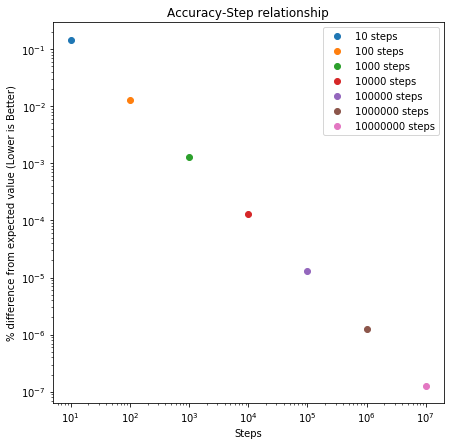

In [4]:
## Calculate integral using 'SciPy' function
expected = sci.quad(f, x_min, x_max)[0]

## Define const for step size
length = 7
P = np.zeros(length)
accuracy = np.zeros(length)

## Begin plot definitions
plt.figure(1, figsize=(7,7))

## Begin 'for' loop to calculate probability 'P' for some
##  number of 'steps'. 'Step' amount increase tenfold each
##  loop. Plot each point at the end of every loop
for i in range(length):
    steps = 10**(i+1)
    x = np.linspace(x_min, x_max, num=steps)

    ## Calculating probability of position
    P[i] = rect_rule(f,x)
    
    ## Comparing accuracy of rectangle rule to numerical function
    accuracy[i] = (abs(P[i] - expected) / expected)
    
    ## Plotting relationship between accuracy and steps used
    plt.plot(steps, accuracy[i], 'o', label="{} steps".format(steps))

## Further plot definitions, show relationship between accuracy and P as steps increase
plt.title('Accuracy-Step relationship')
plt.ylabel('% difference from expected value (Lower is Better)')
plt.xlabel('Steps')
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show(1)

The relationship is logarithmic but resembles a linear function of $y = mx + c$

Here;
* $y$ = log(% Difference)
* $x$ = log(Steps)
* $m$ and $c$ are some constants

This linear relationship is of the first order

## Task 4
Using the Monte-Carlo method to calculate the integral and comparting it to the `SciPy` fucntion.

The integral from the Monte-Carlo method is found by using the formula;
### $$ \frac{summation}{trials} \simeq \frac{integral}{box\;area} $$
or
### $$ integral \simeq \frac{box\;area * summation}{trials} $$

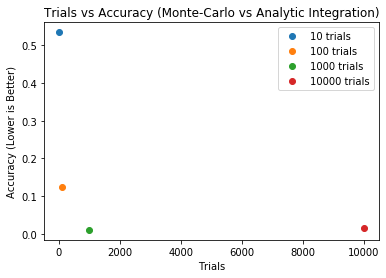

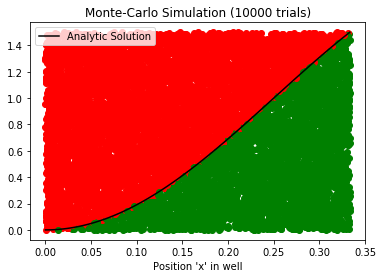

Summation/Trials = 0.385
Integral/Box Area = 0.391

Integral from SciPy = 0.19550
Integral from Monte-Carlo (After 10000 trials) = 0.19230


In [5]:
## Length of 'x' array
n=100

x = np.linspace(x_min, x_max, num=n)

## Get min. and max. 'y' values
y_min = np.min(f(x))
y_max = np.max(f(x))

## Calculate expected integral value
expected = sci.quad(f, x_min, x_max)[0]

## Calculate 'Box Area' and 'RHS' values from formulae provided
box_area = x_max * y_max
rhs = expected / box_area

## Begin nested 'for' loop to get 'summation' for each amount of 'trials'
##  'factor' refers to power of 10 to go up to, ie. factor=4 goes from 10 to 10000 trials.
factor = 4
for i in range(factor):
    trials = 10**(i+1)
    
    ## Introduce 'summation' term for each loop
    summation = 0
    
    ## Begin 'for' loop for trials for Monte-Carlo
    for j in range(trials):
        x_temp = x_max * np.random.random()
        y_temp = y_max * np.random.random()
        
        ## For first plot, I want to visualise how many 'points' fall underneath and above the curve 'f'
        if f(x_temp) >= y_temp:
            summation += 1
            if (i+1) == factor:
                plt.figure(1)
                plt.plot(x_temp, y_temp, 'go')
        else:
            if (i+1) == factor:
                plt.figure(1)
                plt.plot(x_temp, y_temp, 'ro')
            
    ## Calculate the 'LHS' of the formula above
    lhs = summation / trials

    ## Calculating the Monte-Carlo integral
    monte_carlo_integral = lhs * box_area

    ## Calculating the error of the Monte-Carlo integral with relation to expected integral
    error = (abs((monte_carlo_integral - expected) / expected))

    ## Plotting the comparison of trials to error for the Monte-Carlo integral
    plt.figure(2)
    plt.plot(trials, error, 'o', label="{} trials".format(trials))

    
## Overlaying the curve 'f' on the Monte-Carlo plot to observe how it works
plt.figure(1)
plt.plot(x, f(x), 'k-', label='Analytic Solution')
plt.title('Monte-Carlo Simulation ({} trials)'.format(trials))
plt.xlabel("Position 'x' in well")
plt.legend()

## Titling graph of accuracy
plt.figure(2)
plt.title("Trials vs Accuracy (Monte-Carlo vs Analytic Integration)")
plt.xlabel("Trials")
plt.ylabel("Accuracy (Lower is Better)")
plt.legend()

plt.show()

## Printing the original formula with values taken from the last loop
print("""Summation/Trials = {0:2.3f}
Integral/Box Area = {1:2.3f}

Integral from SciPy = {2:2.5f}
Integral from Monte-Carlo (After {3:0.0f} trials) = {4:2.5f}""".format(lhs, rhs, expected, trials, monte_carlo_integral))

The result obtained shows that Monte-Carlo becomes more accurate after large amounts of trials, getting very close to the expected integral after $\sim$10,000 trials.

The time it takes to run the Monte-Carlo with the visualising graph is a lot longer than in takes to run the `SciPy` function, as expected.